<a href="https://colab.research.google.com/github/sudipta-on/Neural-Network-Notes/blob/main/Artificial_Neural_Networks_Basic_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\textbf{Artificial Neural Networks}$

Artificial Neural Networks (ANNs) are powerful machine learning models inspired by Human brain. Just like brain, it uses a network of interconnected artificial neurons or nodes to solving learning problems.

In this session, we will proceed with some simple code example using Tensorflow to understand in more details the ANN.

| Created by - Sudipta Majumder, 22.07.2024

## $\textbf{Perceptron}$

It is one of the oldest and first introduced neural networks. It was proposed by Frank Rosenblatt in 1958, who proposed an algorithm that capable binary classification. In perceptron, the activation function has a special form.

>$\textbf{Algorithm}$
>
>Step 01 | Initialize the weights and the threshold. Weights may be initialized to 0 or to a small random value.
>
>Step 02 | For each example $j$ in the training set $D$, perform the following steps over the input $x_j$ and desired output $d_j$ :
>
>a) Calculate the actual output:
$$y_j(t) = f[w_0(t)x_{j0}+w_1(t)x_{j1}+w_2(t)x_{j2}+...+w_n(t)x_{jn}] $$
>
>b) Update the weights:
$$ w_j(t+1) = w_j(t) + (d_j-y_j(t))x_ji $$ For all features $0\leq i \leq n. $
>
>Step 03 | Step 02 is repeated until the iteration error $\frac{1}{s}\sum^s_{j=1}|d_j -y_j(t)|$ is less than a user-specified error threshold $\gamma$, or a predetermined number of iterations have been completed, where $s$
is again the size of the sample set.

### Single Layer Perceptron using Tensorflow

In [1]:
!pip install numpy matplotlib tensorflow --quiet  # installing required libraries

In [2]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
matplotlib.rc('font', size = 16, family = 'serif')

In [3]:
# Loading the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(f'Information of training dataset: {x_train.shape}')
print(f'Information of testing dataset: {x_test.shape}')

Information of training dataset: (60000, 28, 28)
Information of testing dataset: (10000, 28, 28)


Here, the first integer values defines length of the dataset and the last two digits represents image size of each data.

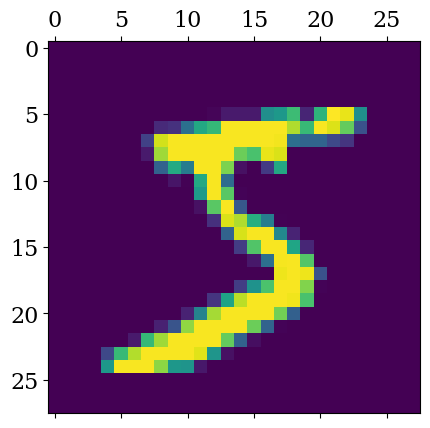

In [5]:
plt.matshow(x_train[0])
plt.show()

In [6]:
# Normalizing the dataset in order to faster calculation
x_train = x_train/255
x_test = x_test/255

# Flattin the dataset in order to compute for model building
xf_train = x_train.reshape(len(x_train), 28*28)
xf_test = x_test.reshape(len(x_test), 28*28)

print(xf_train.shape)

(60000, 784)


In [7]:
# model building
model = keras.Sequential([keras.layers.Dense(10, input_shape= (784,),activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model training
model.fit(xf_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4726 - accuracy: 0.8763
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2586 - accuracy: 0.9281
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - accuracy: 0.9300
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2529 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [8]:
# evaluation
test_loss, test_acc = model.evaluate(xf_test,y_test)
print(f'Test accuracy : {round(test_acc,4)}')
print(f'Test loss     : {round(test_loss,4)}')

313/313 [==============================] - 1s 1ms/step - loss: 0.2649 - accuracy: 0.9264
Test accuracy : 0.9264
Test loss     : 0.2649


### Multy Layer Perceptron

In [9]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.models import Sequential

In [10]:
# Loading dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [11]:
# converting the data into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing image pixel values dividing by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [12]:
print(f"Feature Matrix : {x_train.shape}")
print(f"Label Matrix   : {y_train.shape}")
print(f"Target Matrix  : {x_test.shape}")
print(f"Label Matrix   : {y_test.shape}")

Feature Matrix : (60000, 28, 28)
Label Matrix   : (60000,)
Target Matrix  : (10000, 28, 28)
Label Matrix   : (10000,)


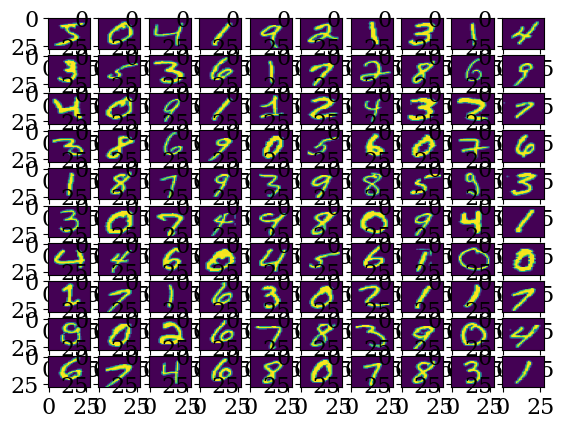

In [13]:
# displaying some the data
fig, ax = plt.subplots(10,10)
k = 0
for i in range(10):
  for j in range(10):
    ax[i][j].imshow(x_train[k].reshape(28,28),aspect ='auto')
    k += 1
plt.show()


In [14]:
# defining model
model = Sequential([
    # reshaping 28 rows * 28 columns data to 28*28 rows
    Flatten(input_shape=(28,28)),
    # Dense layer 1
    Dense(256, activation='sigmoid'),
    # Dense layer 2
    Dense(128, activation='sigmoid'),
    # Dense layer 3
    Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# training the model
model.fit(x_train,y_train, epochs=10, batch_size=2000, validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 2s 68ms/step - loss: 2.1113 - accuracy: 0.4080 - val_loss: 1.7747 - val_accuracy: 0.6576
Epoch 2/10
24/24 [==============================] - 1s 62ms/step - loss: 1.4356 - accuracy: 0.7433 - val_loss: 1.0670 - val_accuracy: 0.8053
Epoch 3/10
24/24 [==============================] - 2s 84ms/step - loss: 0.8842 - accuracy: 0.8169 - val_loss: 0.6842 - val_accuracy: 0.8573
Epoch 4/10
24/24 [==============================] - 2s 88ms/step - loss: 0.6164 - accuracy: 0.8585 - val_loss: 0.5079 - val_accuracy: 0.8851
Epoch 5/10
24/24 [==============================] - 1s 53ms/step - loss: 0.4852 - accuracy: 0.8806 - val_loss: 0.4176 - val_accuracy: 0.8972
Epoch 6/10
24/24 [==============================] - 1s 53ms/step - loss: 0.4121 - accuracy: 0.8954 - val_loss: 0.3647 - val_accuracy: 0.9050
Epoch 7/10
24/24 [==============================] - 1s 60ms/step - loss: 0.3657 - accuracy: 0.9029 - val_loss: 0.3297 - val_accuracy: 0.9137
Epoch 8/10
24

In [16]:
# Finding the accuracy of the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy : {round(test_acc,4)}')
print(f'Test loss     : {round(test_loss,4)}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2739 - accuracy: 0.9236
Test accuracy : 0.9236
Test loss     : 0.2739
